# Exercise 5: Image Addition and Approximation BUT NOW WE FOCUS ON ENERGY CONSUMPTION



**Date**: Wednesday, November 22, 11:15am

Malte Bauer, Florian Schrittwieser

<br>

## Recap of Ex3
You have already seen everything. We will skip the explanation.

<br>

### Loading required packages packages

In [18]:
from skimage import io, img_as_float, img_as_ubyte
from skimage.metrics import structural_similarity as ssim
from scipy import signal
from math import log10
import matplotlib.pyplot as plt
import numpy as np

<br>

(672, 570, 3)
(672, 570)


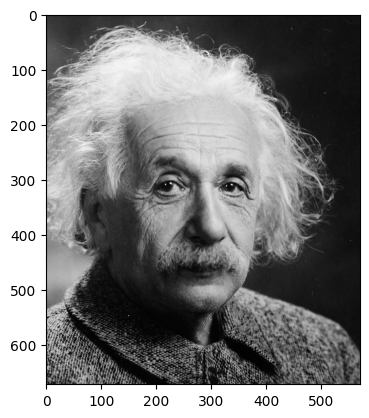

In [19]:
einstein_img = io.imread("Einstein.jpg")
print(einstein_img.shape)

R_1 = einstein_img[:, :, 0] 
G_1 = einstein_img[:, :, 1]
B_1 = einstein_img[:, :, 2]

#formula for converting colour(RGB) to Gray Image scale Image
Y_einstein = (0.299 * np.array(R_1)) + (0.587 * np.array(G_1)) + (0.114 * np.array(B_1)) 

plt.imshow(Y_einstein , cmap = "gray")
print(Y_einstein.shape)

(672, 570)


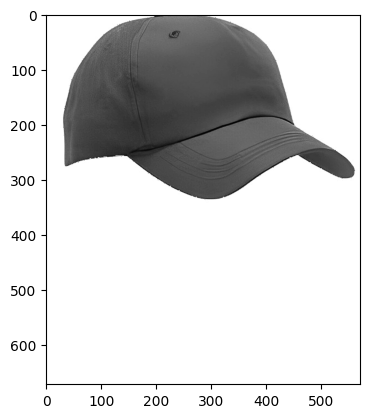

In [20]:
img_cap = io.imread("cap.jpg")
R_2 = img_cap[:, :, 0] 
G_2 = img_cap[:, :, 1]
B_2 = img_cap[:, :, 2]

#formula for converting colour(RGB) to Gray Image scale Image
Y_cap = (0.299 * np.array(R_2)) + (0.587 * np.array(G_2)) + (0.114 * np.array(B_2)) 

plt.imshow(Y_cap , cmap = "gray")
print(Y_cap.shape)

#

<br>

### Subtask 3: Approximate Addition
In this Subtask we want to take the binary addition to the next step and build on top of an exact/approximate binary addition a NBit-Adder that can not only perform addition of any decimal number but also control the level of approximation


### Exact Adder Function
The ExactAdder function performs binary addition on three input bits (a, b, and c). It outputs the sum (s) and carry-out (c_out) based on the combination of input bits. The function encapsulates the logic of a full adder, handling all possible input cases through conditional statements. It is a fundamental component in digital circuit design.

In [21]:
def ExactAdder(a, b, c):
    if a==0 and b==0 and c==0:
        s=0
        c_out=0
        energy_consumption = 2153
    elif a==0 and b==0 and c==1:
        s=1
        c_out=0
        energy_consumption = 2043
    elif a==0 and b==1 and c==0:
        s=1
        c_out=0
        energy_consumption = 1941
    elif a==0 and b==1 and c==1:
        s=0
        c_out=1
        energy_consumption = 1881
    elif a==1 and b==0 and c==0:
        s=1
        c_out=0
        energy_consumption = 2069
    elif a==1 and b==0 and c==1:
        s=0
        c_out=1
        energy_consumption = 1976
    elif a==1 and b==1 and c==0:
        s=0
        c_out=1
        energy_consumption = 1966
    elif a==1 and b==1 and c==1:
        s=1
        c_out=1
        energy_consumption = 1892
    return s, c_out, energy_consumption #in pJ

<br>

### Approximate Adder Function
The ApproxAdder function attempts binary addition but deviates from conventional logic in its handling of input combinations. In particular, it provides an inaccurate sum (s) for the cases (0, 0, 0) and (1, 1, 1).

Failure Cases:

#### Input (0, 0, 0):
Incorrect sum (s) = 1
Correct carry-out (c_out) = 0

#### Input (1, 1, 1):
Incorrect sum (s) = 0
Correct carry-out (c_out) = 1

#### Considerations:
The function's approach to binary addition may have specific intentions, but users should be cautious about its accuracy, especially in scenarios requiring precise binary addition.

#### Function Usage:
Call the function with three binary inputs (a, b, and c) to obtain the potentially inaccurate sum (s) and correct carry-out (c_out).

In [22]:
# pattern for aproximation and exact adder
energy_consumption_list = []
energy_consumption_list.append([2153, 2043, 1941, 1881, 2069, 1976, 1966, 1892]) # exact adder
energy_consumption_list.append([772.01, 715.242, 716.736, 693.766, 751.802, 700.172, 688.285, 678.696]) # Algo 1 Serial Aprox
energy_consumption_list.append([722.64, 801.437,667.417, 686.277, 759.353, 742.095, 695.799, 720.61]) # Algo 2 SAFIA1
energy_consumption_list.append([1011.046, 955.49, 960.609, 946.953, 910.111, 898.936, 936.505, 927.341]) # Algo 3 SAFIA2
energy_consumption_list.append([722.58, 709.08, 760.5, 744.12, 668.6, 689.24, 698.24, 724.26]) # Algo 4 SAFIA3
energy_consumption_list.append([722.68, 709.38, 667.2, 687.02, 752.12, 729.72, 701.59, 721.4]) # Algo 5 SAFIA4

truthTable_s_list = []
truthTable_s_list.append([1, 1, 1, 0, 1, 0, 0, 0]) # exact adder
truthTable_s_list.append([1, 1, 1, 0, 1, 1, 0, 0]) # Algo 1 Serial Aprox
truthTable_s_list.append([1, 1, 1, 0, 1, 1, 0, 0]) # Algo 2 SAFIA1
truthTable_s_list.append([1, 1, 1, 0, 1, 0, 0, 0]) # Algo 3 SAFIA2
truthTable_s_list.append([1, 1, 1, 1, 1, 0, 0, 0]) # Algo 4 SAFIA3
truthTable_s_list.append([1, 1, 1, 0, 1, 0, 1, 0]) # Algo 5 SAFIA4

truthTable_c_list = []
truthTable_c_list.append([0, 0, 0, 1, 0, 1, 1, 1]) # exact adder
truthTable_c_list.append([0, 0, 0, 1, 0, 0, 1, 1]) # Algo 1 Serial Aprox
truthTable_c_list.append([0, 0, 0, 1, 0, 0, 1, 1]) # Algo 2 SAFIA1
truthTable_c_list.append([0, 1, 0, 1, 0, 1, 1, 1]) # Algo 3 SAFIA2
truthTable_c_list.append([0, 0, 0, 0, 0, 1, 1, 1]) # Algo 4 SAFIA3
truthTable_c_list.append([0, 0, 0, 1, 0, 1, 0, 1]) # Algo 5 SAFIA4

nameApprox_list = []
nameApprox_list.append("exact Adder")
nameApprox_list.append("Serial Aprox")
nameApprox_list.append("SAFIA 1")
nameApprox_list.append("SAFIA 2")
nameApprox_list.append("SAFIA 3")
nameApprox_list.append("SAFIA 4")


In [23]:
# write data to json file 
import json 
# Create a dictionary to hold the parsed data
parsed_data = {}
empty_list = [0,0,0,0,0,0,0,0]

# Populate the dictionary
for i, name in enumerate(nameApprox_list):
    parsed_data[name] = {"s": truthTable_s_list[i], "c": truthTable_c_list[i], "energy": energy_consumption_list[i], "ssi": empty_list, "psnr": empty_list, "energy_con": empty_list}

json_file_path = 'data.json'

# Write the data to the JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(parsed_data, json_file, indent=4)


In [24]:
# load data from jsonfile 

# Load the data from the JSON file into a dictionary
with open(json_file_path, 'r') as json_file:
    loaded_dict = json.load(json_file)

In [25]:
# assign the correct values for carry sum and energy acccording to choosen Algorithm

def ApproxAdder(a, b, c, approxAlgo):
    if a==0 and b==0 and c==0:
        s = loaded_dict[approxAlgo]["s"][0]
        c_out = loaded_dict[approxAlgo]["c"][0]
        energy_consumption = loaded_dict[approxAlgo]["energy"][0]
    elif a==0 and b==0 and c==1:
        s = loaded_dict[approxAlgo]["s"][1]
        c_out = loaded_dict[approxAlgo]["c"][1]
        energy_consumption = loaded_dict[approxAlgo]["energy"][1]
    elif a==0 and b==1 and c==0:
        s = loaded_dict[approxAlgo]["s"][2]
        c_out = loaded_dict[approxAlgo]["c"][2]
        energy_consumption = loaded_dict[approxAlgo]["energy"][2]
    elif a==0 and b==1 and c==1:
        s = loaded_dict[approxAlgo]["s"][3]
        c_out = loaded_dict[approxAlgo]["c"][3]
        energy_consumption = loaded_dict[approxAlgo]["energy"][3]
    elif a==1 and b==0 and c==0:
        s = loaded_dict[approxAlgo]["s"][4]
        c_out = loaded_dict[approxAlgo]["c"][4]
        energy_consumption = loaded_dict[approxAlgo]["energy"][4]
    elif a==1 and b==0 and c==1:
        s = loaded_dict[approxAlgo]["s"][5]
        c_out = loaded_dict[approxAlgo]["c"][5]
        energy_consumption = loaded_dict[approxAlgo]["energy"][5]
    elif a==1 and b==1 and c==0:
        s = loaded_dict[approxAlgo]["s"][6]
        c_out = loaded_dict[approxAlgo]["c"][6]
        energy_consumption = loaded_dict[approxAlgo]["energy"][6]
    elif a==1 and b==1 and c==1:
        s = loaded_dict[approxAlgo]["s"][7]
        c_out = loaded_dict[approxAlgo]["c"][7]
        energy_consumption = loaded_dict[approxAlgo]["energy"][7]
    return s, c_out, energy_consumption

<br>

### N-bit Adder Function

The `MyNbitAdder` function is designed to perform N-bit addition, where the lower 4 bits utilize an approximate adder (`ApproxAdder`), and the remaining bits employ an exact adder (`ExactAdder`).

#### Function Overview

1. **Input Conversion:**
   - Convert input integers `a` and `b` to binary and remove the binary prefix.

2. **Byte Reversal:**
   - Reverse the order of bits in both binary representations.

3. **Equalizing Byte Length:**
   - Ensure both binary representations have equal length by padding with zeros.

4. **Bitwise Addition:**
   - Perform bitwise addition, using either the approximate adder or exact adder based on the specified threshold (`approx_until`).

5. **Result Calculation:**
   - Calculate the total sum by summing up the bitwise results and accounting for any carry-over.

This function allows users to perform N-bit addition with a customizable threshold (`approx_until`) to switch between the approximate and exact adders. Adjust the threshold as needed for specific requirements.

In [26]:
#In 8 bit adder, lower 3 bits are implemented with approximate adder and rest of the with exact adder
def MyNbitAdder(a,b, Algo, Bit):
    #convert to binary and cut off the first two indices (they dont belong to the number but indicate that it is binary)
    a_bin, b_bin = bin(a)[2:] , bin(b)[2:]
    
    #reverse order of bytes for the adder
    rev_a , rev_b = list(a_bin[::-1]), list(b_bin[::-1])
    
    
    #We want to make the to bytes to equalt length such that we can add 
    #--> add zeros to the shortest list until it is the same as the longest
    rev_a = rev_a + max(0, len(rev_b)-len(rev_a)) * [0]
    rev_b = rev_b + max(0, len(rev_a)-len(rev_b)) * [0]
    
    
    carry_over  = 0
    total_sum   = 0
    
    #############################################
    approx_until = Bit #change this if u want to approximate the first bits by an approximate adder
    #############################################

    #we want to do a bitwise addition
    count = 0
    total_energy = 0
    for index, (bit1, bit2) in enumerate( zip(rev_a, rev_b) ):
        if index <= approx_until:
            #use approx_adder
            sum_element, carry_over, _energy = ApproxAdder(int(bit1), int(bit2), int(carry_over), Algo) 
        else:
            #use exact_adder
            sum_element, carry_over, _energy = ExactAdder(int(bit1), int(bit2), int(carry_over))
        
        count = count + 1
        total_energy += _energy

        total_sum += pow(2,index)*sum_element

    total_sum += pow(2,index+1)*carry_over
    return total_sum, count, total_energy #total energy in pJ!

print(MyNbitAdder(512,512, "Algo 1",4))

(1055, 10, 14438.05)


<br>

### Image Adder Function

The `MyAdder` function is designed to add two images represented as arrays (`f` and `g`). It utilizes a custom N-bit adder (`MyNbitAdder`) for element-wise addition of corresponding pixel values.

#### Function Overview

1. **Input Conversion:**
   - Convert input images `f` and `g` to NumPy arrays and ensure they are of integer type.

2. **Image Size Validation:**
   - Ensure that the size of both images is the same.

3. **Pixel-wise Addition:**
   - Iterate through each pixel of the images and use the custom N-bit adder (`MyNbitAdder`) to add corresponding pixel values.

4. **Resultant Image:**
   - Return the resultant image as a NumPy array.

This function allows users to add two images pixel-wise using the custom N-bit adder. Ensure that the images have the same size for proper element-wise addition. Adjust the input images as needed for specific use cases.

In [27]:
# Function that addes two images
max_Nbit_adder = np.zeros(Y_einstein.shape) ## maximum bit of adders required to add two decimal values
def MyAdder(f,g, Algo, Bit):
    total_energy = 0
    
    f=np.array(f).astype(int)
    g=np.array(g).astype(int)
    #ensure that the size of the image is the same    
    res = np.zeros(f.shape)    
    for i in range(f.shape[0]):
        for j in range(f.shape[1]):         
            #we will use a custom adding function
            res[i, j], max_Nbit_adder[i, j], _energy = MyNbitAdder(f[i,j],g[i,j], Algo, Bit)
            total_energy += _energy
    return res, max_Nbit_adder, total_energy

<br>

### Subtask 4: Display added image and Measuring Metrics
Lets see the result of our adder and compare it to the original

C:\Users\flori\AppData\Local\Temp\ipykernel_20364\300619314.py:32: RuntimeWarning: divide by zero encountered in scalar divide
  loaded_dict[approxAlgo]["psnr"][indexBit] = round(10 * log10((add_approx_list[0].max()**2) /mse),2)


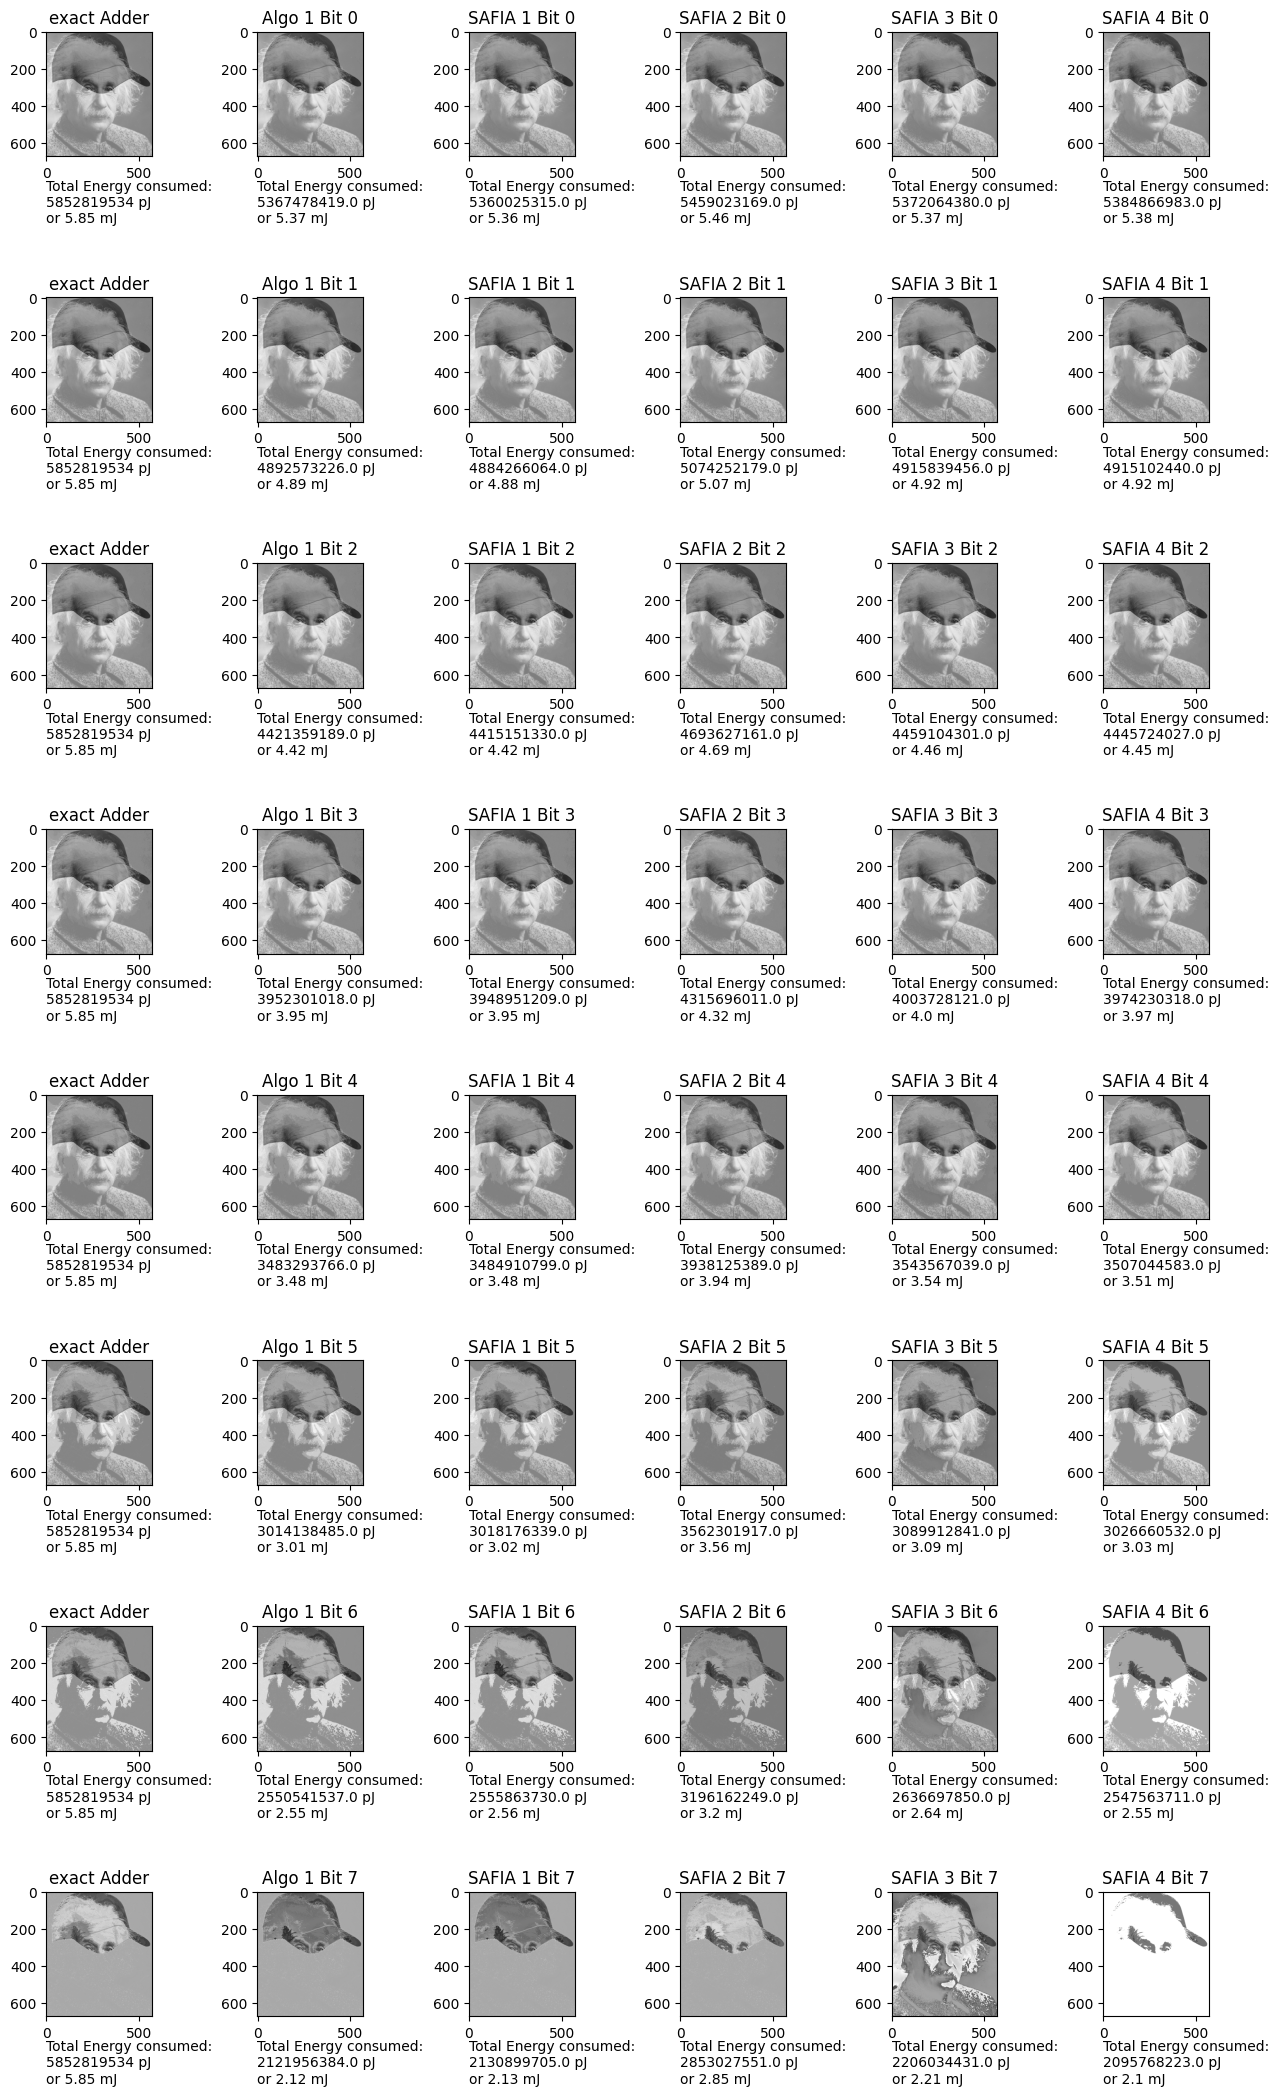

In [33]:
rows = 8
coll = 6
bit_list = range(0,rows)
algo_list = ["exact Adder","Algo 1","SAFIA 1","SAFIA 2","SAFIA 3","SAFIA 4"]

fig, axs = plt.subplots(rows, coll, figsize=(15, 5))  # 5 rows, 1 column
plt.subplots_adjust(left=0.125, bottom=6, right=0.9, top=10, wspace=1, hspace=0.9)

add_approx_list = []
# loop throw all Bitpositions 
for indexBit, approxBit in enumerate(bit_list):
    # loop throw all Algorithm
    for indexAlgo, approxAlgo in enumerate(algo_list):
        # run calculation
        add_approx, max_Nbit_adder, total_energy = MyAdder(Y_einstein,Y_cap,approxAlgo,approxBit)

        add_approx_list.append(add_approx)
        # show picture in subplot
        axs[indexBit,indexAlgo].imshow(add_approx_list[-1], cmap = "gray")
        # Add an annotation to the subplot
        axs[indexBit,indexAlgo].annotate(f"\nTotal Energy consumed: \n{round(total_energy,0)} pJ \nor {round(total_energy/10**9,2)} mJ", (0,0), (0,-5),xycoords='axes fraction', textcoords='offset points', va='top')
       
        if approxAlgo == "exact Adder":
            axs[indexBit,indexAlgo].set_title(f"{approxAlgo}")
        else:
            axs[indexBit,indexAlgo].set_title(f"{approxAlgo} Bit {approxBit}")
        
        data_range = add_approx_list[0].max() - add_approx_list[-1].max()  
        mse = np.mean((add_approx_list[0] - add_approx_list[-1])**2)     
        # load results to dictionary
        loaded_dict[approxAlgo]["ssi"][indexBit] = round(ssim(add_approx_list[0], add_approx_list[-1], data_range=data_range),2)
        loaded_dict[approxAlgo]["psnr"][indexBit] = round(10 * log10((add_approx_list[0].max()**2) /mse),2)
        loaded_dict[approxAlgo]["energy_con"][indexBit] = round(total_energy/10**9,2)

        # print(f"{approxAlgo} Bit {approxBit}")    
        # print(f"{approxAlgo} \tBit {approxBit} \tssi {loaded_dict[approxAlgo]['ssi']} \tpsnr {loaded_dict[approxAlgo]['psnr']} \tenergy {loaded_dict[approxAlgo]['energy_con']}")

# Show the plot
plt.show()

# Write data to the JSON file
with open(json_file_path, 'w') as json_file:
    json.dump(loaded_dict, json_file, indent=4)

[]

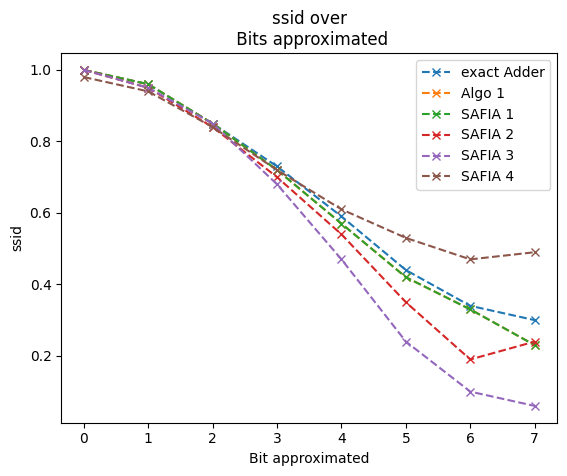

In [34]:
# plot ssid over approximation of different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loaded_dict[algo]["ssi"],"x--",  label=algo)
    plt.title(f"ssid over\n Bits approximated")
    plt.xlabel("Bit approximated")
    plt.ylabel("ssid")

plt.legend()
plt.plot()

[]

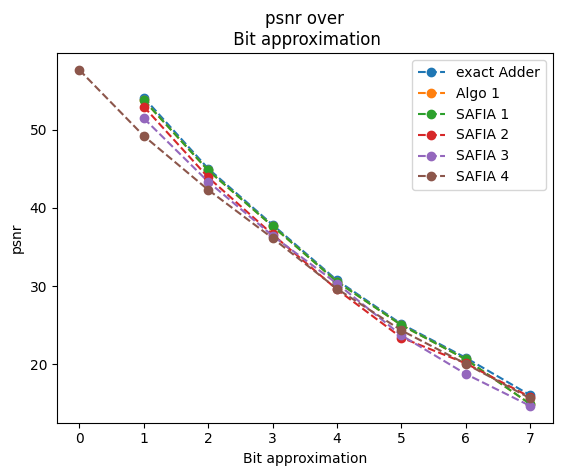

In [35]:
# peak signal to noice ratio over different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loaded_dict[algo]["psnr"],"o--",  label=algo)
    plt.title(f"psnr over\n Bit approximation")
    plt.xlabel("Bit approximation")
    plt.ylabel("psnr")


plt.legend()
plt.plot()

[]

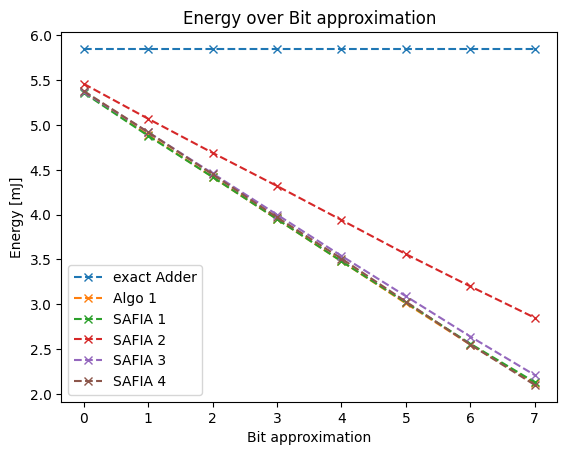

In [36]:
# energy consumption over different amount of Bits and algorithms
for indexalgo, algo in enumerate(algo_list):
    plt.plot(loaded_dict[algo]["energy_con"],"x--",  label=algo)
    plt.title(f"Energy over Bit approximation")
    plt.xlabel("Bit approximation")
    plt.ylabel("Energy [mJ]")

plt.legend()
plt.plot()